# Vaidya with sin(wt)^2 mass

In [15]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor

sympy.init_printing()

https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

https://en.wikipedia.org/wiki/Vaidya_metric

In [16]:
syms = sympy.symbols("u r theta phi")
G, M, c, a, w = sympy.symbols("G M c a w")
a = 2*M*((sin(w*syms[0]))**2)
print(a)
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - (a / syms[1]))* (c ** 2)
list2d[0][1] = c #need to have this switch from -ve to +ve so use sin?
list2d[1][0] = c
list2d[1][1] = 0 
list2d[2][2] = 1 * (syms[1] ** 2) 
list2d[3][3] = 1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


2*M*sin(u*w)**2


⎡   ⎛       2         ⎞                   ⎤
⎢ 2 ⎜2⋅M⋅sin (u⋅w)    ⎟                   ⎥
⎢c ⋅⎜───────────── - 1⎟  c  0       0     ⎥
⎢   ⎝      r          ⎠                   ⎥
⎢                                         ⎥
⎢          c             0  0       0     ⎥
⎢                                         ⎥
⎢                            2            ⎥
⎢          0             0  r       0     ⎥
⎢                                         ⎥
⎢                                2    2   ⎥
⎣          0             0  0   r ⋅sin (θ)⎦

### Calculating the Einstein Tensor (with both indices covariant)

In [17]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡2⋅M⋅c⋅w⋅sin(2⋅u⋅w)         ⎤
⎢──────────────────  0  0  0⎥
⎢         2                 ⎥
⎢        r                  ⎥
⎢                           ⎥
⎢        0           0  0  0⎥
⎢                           ⎥
⎢        0           0  0  0⎥
⎢                           ⎥
⎣        0           0  0  0⎦

Since t = u + r/c - we have light transit time affected neat solution. There is a wave of potential. Note the scaling with w - the effect is larger for w being large. 

In [7]:
# what is the Weyl tensor?
#weyl = WeylTensor.from_metric(sch)
#weyl.tensor() # all components!

(u, r, theta, phi, M, c, w)


Text(0.5, 1.0, 'T_01')

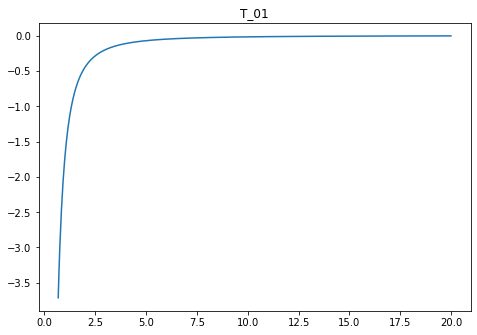

In [12]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the arglument values 

# idea - make graph a function of t, r, which will show waves
#u = t - r - a*ln(r/a -1)

#Make x values - which we will sub in for r 
x = np.arange(0.7, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1, 1)[0][1]

# Call the functions
y = func(-1.0,x,1, 1, 1, 1, 1)[0][0]
#z = -func(-1.0,x,1, 1, 1, 1, 1)[2][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
#ax.plot(x,z)
ax.set_title("T_01")


